### Linear Regression with One Variable

In [12]:
import numpy as np
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('SBP.csv')

In [15]:
# We will only consider Age for our model to determine SBP
df.head()
m = df['Age'].size

Text(0, 0.5, 'SBP')

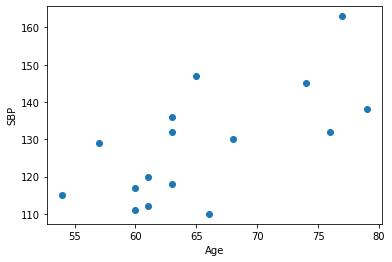

In [16]:
plt.scatter(df['Age'], df['SBP'])
plt.xlabel("Age")
plt.ylabel("SBP")

In [17]:
# Hypothesis
theta_0 = 0
theta_1 = 0

def hypothesis(t_0, t_1, x):
    return t_0 + t_1 * x

In [18]:
# Cost Function
def cost(t_0, t_1):
    cur_cost = 0
    for i in range(1, m):
        x = hypothesis(t_0, t_1, df['Age'][i]) - df['SBP'][i]
        cur_cost += (x * x)
    return cur_cost / (2 * m)

In [19]:
def gradient_descent(theta_0, theta_1):
    costs = []
    theta_0s = [theta_0]
    theta_1s = [theta_1]
    alpha = 0.000001

    for i in range(5000):
        sum_0 = 0
        for j in range(m):
            x = hypothesis(theta_0, theta_1, df['Age'][j]) - df['SBP'][j]
            sum_0 += x

        sum_1 = 0;
        for j in range(m):
            x = hypothesis(theta_0, theta_1, df['Age'][j]) - df['SBP'][j]
            sum_1 += (x * df['Age'][j])

        new_theta_0 = theta_0 - alpha * sum_0 / m
        new_theta_1 = theta_1 - alpha * sum_1 / m

        theta_0 = new_theta_0
        theta_1 = new_theta_1

        cur_cost = cost(theta_0, theta_1)
        costs.append(cur_cost)
        theta_0s.append(theta_0)
        theta_1s.append(theta_1)

        # print(cur_cost)
    return [theta_0, theta_1, theta_0s, theta_1s]

In [20]:
[computed_theta_0, computed_theta_1, theta_0s, theta_1s] = gradient_descent(theta_0, theta_1)

In [21]:
print(computed_theta_0, computed_theta_1)

0.03194997200861677 1.9548270990470324


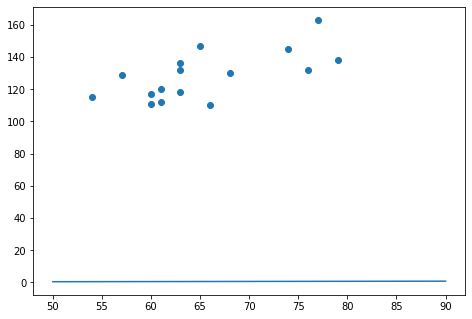

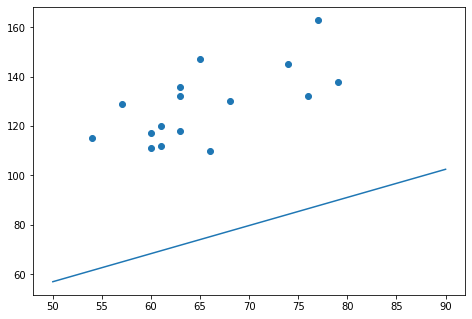

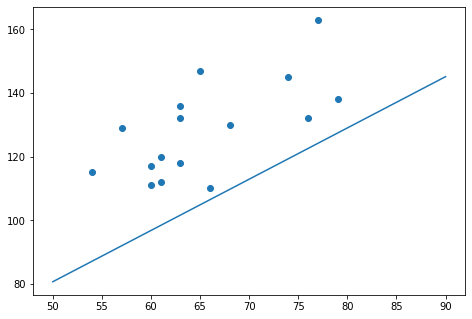

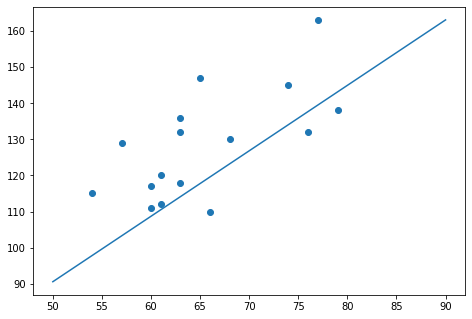

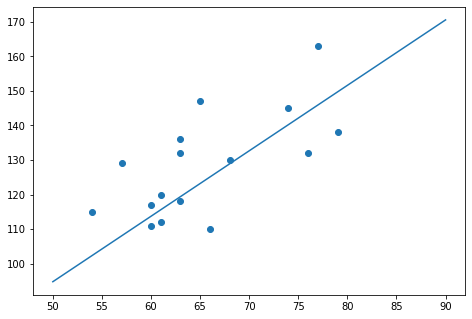

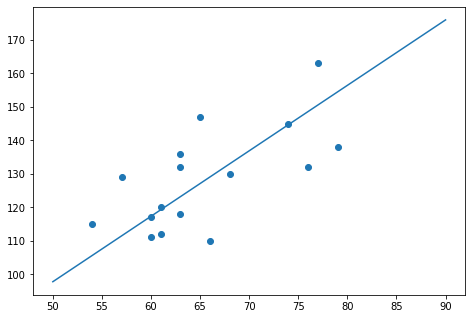

In [22]:
def plot(t_0, t_1):
    y = [hypothesis(t_0, t_1, 50), hypothesis(t_0, t_1, 90)]
    fig = plt.figure()
    axes = fig.add_axes([0,0, 1, 1])
    axes.plot(x, y)
    axes.scatter(df['Age'], df['SBP'])

x = [50, 90]
for i in range(1, 1000, 200):
    plot(theta_0s[i], theta_1s[i])

# Final
plot(computed_theta_0, computed_theta_1)
